## Post-Russian Invasion Survey of Smallholder Farmers 2022, Ukraine

Beyond causing immediate hardship and triggering a large exodus of displaced people, Russia’s military invasion of Ukraine
and the blockade of its Black Sea export routes have also led to sharp increases in grain prices and raised concern about
global food security. To provide information to the government for developing policies and programs to support the
agricultural sector in Ukraine, a survey was done in areas controlled by Ukraine from
October to December of 2022.

Objective:
The survey objective is to obtain information on changes in welfare, production, and
productivity in the small and medium farm sector between 2021 and 2022 and to identify ways on how farmers could be most effectively supported.

In [204]:
# import libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [205]:
# import datasets 

respondent= pd.read_csv('Resident_background.csv')
respondent_hh = pd.read_csv('Resident_household.csv')

agriculture=pd.read_csv('Agriculture_Production.csv',low_memory=False)
price= pd.read_csv('input_price_index.csv')


In [892]:
finance=pd.read_csv('Property_and_finance.csv')

In [206]:
# Background of Respondent 
respondent.head()

,CASE_ID,FARM_ID,region,regname,respondent,Sex,Age,highest_Degree,Farm_area(ha),respondant_region,resident_type
0,4968826,8454.0,Central,Cherkasy,NaN,NaN,NaN,NaN,65.0,Cherkaska Oblast,Village
1,4914858,6111.0,Central,Cherkasy,NaN,NaN,NaN,NaN,87.0,Cherkaska Oblast,Urban-type settlement (SMT)
2,6400228,6771.0,Central,Cherkasy,NaN,NaN,NaN,NaN,50.0,Cherkaska Oblast,Village
3,4913233,6388.0,Central,Cherkasy,Manager without any relationship to owner,Female,49.0,Higher (master degree or PhD),80.0,Cherkaska Oblast,Village
4,4794302,3663.0,Central,Cherkasy,Manager without any relationship to owner,Female,40.0,Higher (master degree or PhD),158.0,Cherkaska Oblast,Town 20 - 49 000 inhabitants


In [207]:
respondent.shape

(2251, 11)

In [208]:
respondent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CASE_ID            2251 non-null   int64  
 1   FARM_ID            2250 non-null   float64
 2   region             2251 non-null   object 
 3   regname            2251 non-null   object 
 4   respondent         520 non-null    object 
 5   Sex                520 non-null    object 
 6   Age                520 non-null    float64
 7   highest_Degree     520 non-null    object 
 8   Farm_area(ha)      2236 non-null   float64
 9   respondant_region  2251 non-null   object 
 10  resident_type      2251 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 193.6+ KB


In [209]:
# check for duplicates 
respondent.duplicated().sum()

0

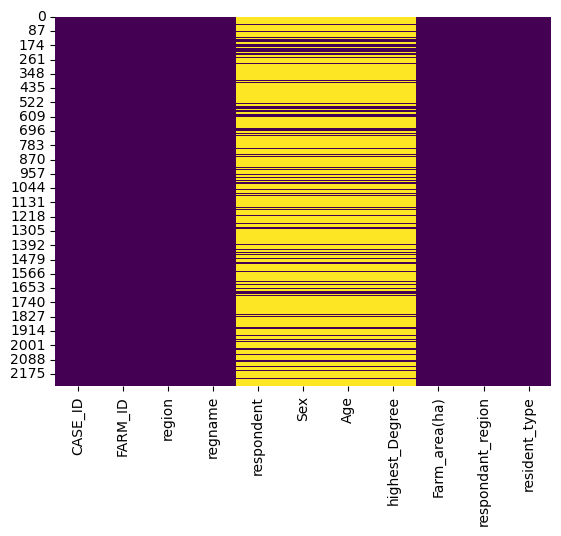

In [210]:
# heatmap to show the distibution of missing values 
sns.heatmap(respondent.isna(),cbar=False,cmap='viridis')
plt.show()

> The owner's background information is stored in another file.

In [211]:
respondent['respondent'].fillna('Owner',inplace=True)
respondent_relation=respondent['respondent'].value_counts()

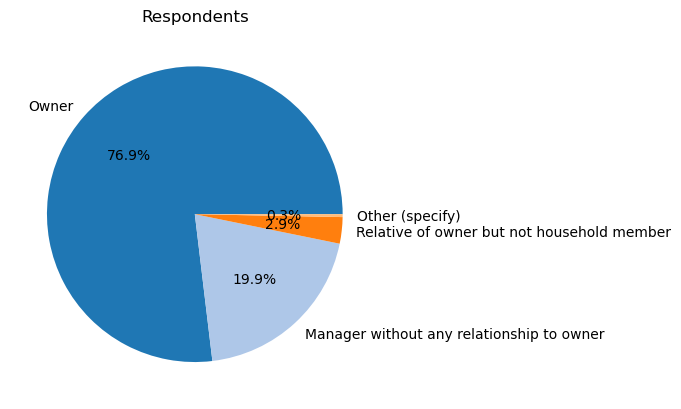

In [212]:
plt.pie(respondent_relation,
       labels=respondent_relation.index,
       autopct='%.1f%%',
       radius=1)
plt.title('Respondents')
plt.show()

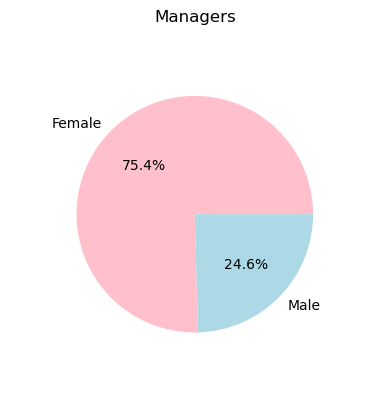

In [213]:
# gender of managers 
manager=respondent[respondent['respondent']=='Manager without any relationship to owner']['Sex'].value_counts()
plt.pie(manager,
       autopct='%.1f%%',
       labels=manager.index,
       radius=0.8,
       colors=['pink','lightblue'])
plt.title('Managers')
plt.show()

In [214]:
# descriptive stats for Age and Farm area
respondent[['Farm_area(ha)']].describe()

,Farm_area(ha)
count,2236.000000
mean,472.540250
std,1590.934279
min,0.000000
25%,50.000000
50%,100.000000
75%,280.000000
max,32000.000000


In [215]:
res_type=respondent['resident_type'].value_counts()
res_type

Village                          1574
Urban-type settlement (SMT)       309
Town up to 20 000 inhabitants     140
City 100-499 000 inhabitants       82
Town 20 - 49 000 inhabitants       70
City 500 000 + inhabitants         50
Town 50 - 99 000 inhabitants       26
Name: resident_type, dtype: int64

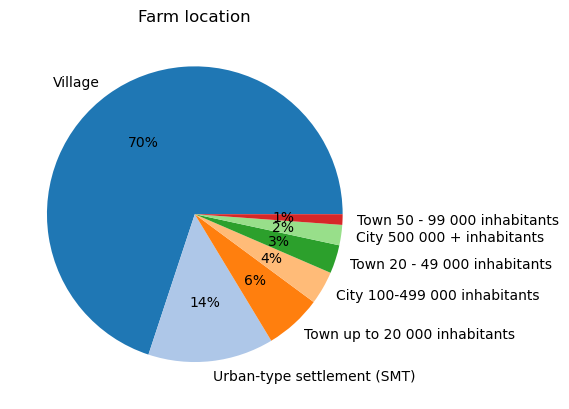

In [216]:
plt.pie(res_type,
        autopct='%.f%%',
       labels=res_type.index,
       rotatelabels=False)
plt.title('Farm location')
plt.show()

Since 70% of famrs belong to village, it is not statistically correct to compare village to each type of resident location.

### Comparison of average land area of village and non-village residents

In [217]:
# create a column to specify if it is a village
respondent['is_Village'] = respondent['resident_type'].apply(lambda x: 1 if x == 'Village' else 0)

In [218]:
farm_area=respondent.groupby('is_Village')['Farm_area(ha)'].mean()
farm_area

is_Village
0    659.854599
1    391.714469
Name: Farm_area(ha), dtype: float64

In [219]:
# since 70% of data belongs to village
weight_non_vill=0.30
weight_vill=0.70

In [220]:
# find the weighted average
weighted_farm_area=farm_area.mul([weight_non_vill,weight_vill])
weighted_farm_area

is_Village
0    197.956380
1    274.200128
Name: Farm_area(ha), dtype: float64

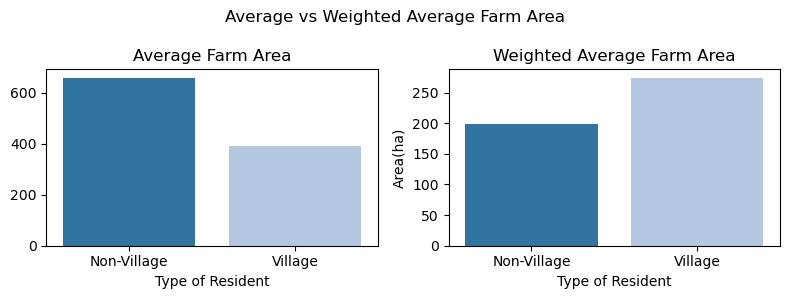

In [221]:
fig,axes=plt.subplots(1,2,figsize=(8,3))
sns.barplot(x=farm_area.index,
           y=farm_area.values,
           ax=axes[0])

axes[0].set_xticks([0,1],['Non-Village','Village'])

sns.barplot(x=weighted_farm_area.index,
           y=weighted_farm_area.values,
           ax=axes[1])

axes[1].set_xticks([0,1],['Non-Village','Village'])

axes[0].set_title('Average Farm Area')
axes[1].set_title('Weighted Average Farm Area')
axes[0].set_xlabel('Type of Resident')
axes[1].set_xlabel('Type of Resident')
plt.ylabel('Area(ha)')

plt.suptitle('Average vs Weighted Average Farm Area')
plt.tight_layout()
plt.show()

In [222]:
vill_area_stats=respondent[respondent['is_Village']==1]['Farm_area(ha)'].describe()

In [223]:
non_vill_stats=respondent[respondent['is_Village']==0]['Farm_area(ha)'].describe()

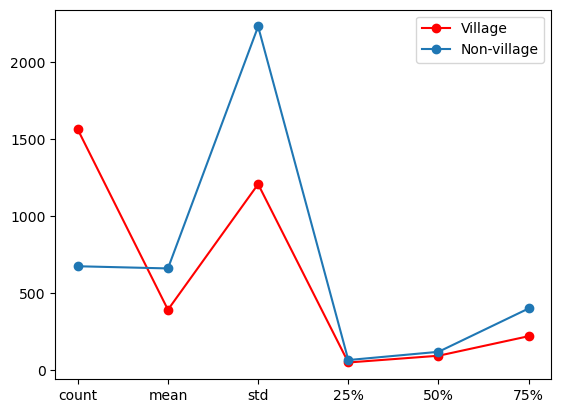

In [224]:
plt.plot(vill_area_stats.drop(['max','min']),
        marker='o',
        color='r')
plt.plot(non_vill_stats.drop(['max','min']),
        marker='o')
plt.legend(['Village','Non-village'])
plt.show()

In [225]:
respondent.head(2)

,CASE_ID,FARM_ID,region,regname,respondent,Sex,Age,highest_Degree,Farm_area(ha),respondant_region,resident_type,is_Village
0,4968826,8454.0,Central,Cherkasy,Owner,NaN,NaN,NaN,65.0,Cherkaska Oblast,Village,1
1,4914858,6111.0,Central,Cherkasy,Owner,NaN,NaN,NaN,87.0,Cherkaska Oblast,Urban-type settlement (SMT),0


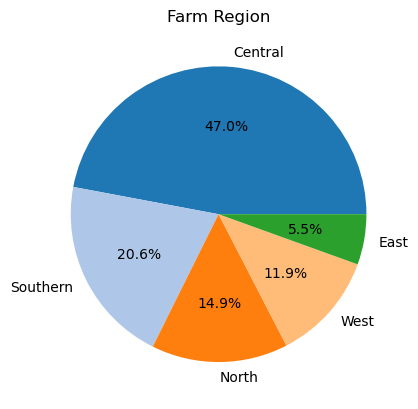

In [238]:
plt.pie(respondent['region'].value_counts(),
       labels=respondent['region'].value_counts().index,
       autopct='%.1f%%')
plt.title('Farm Region')
plt.show()

In [239]:
# check household data 
respondent_hh.head()

,CASE_ID,FARM_ID,member_id,relation_type,other_relation,house_head,sex,age,highest_edu,bank_status,socialmedia,current_location,current_status,status_2021,current_monthly_income,monthly_income_2021
0,4754249,236.0,1,1,NaN,Yes,Male,62.0,"Secondary special, incomplete higher (technica...",Yes,Yes,This village,Pensioner,"Work based on engagement contract, author cont...",NaN,NaN
1,4754562,2537.0,1,1,NaN,Yes,Male,22.0,Base higher (bachelor degree),Yes,Yes,This village,Student,Student,2000 to 5000 UAH,2000 to 5000 UAH
2,4754562,2537.0,2,Mother/Farther,NaN,Yes,Male,43.0,Base higher (bachelor degree),Yes,Yes,This village,Employed by an employer (in the private or pub...,Employed by an employer (in the private or pub...,10000 to 15000 UAH,10000 to 15000 UAH
3,4754562,2537.0,3,Mother/Farther,NaN,No,Female,43.0,Higher (master degree or PhD),Yes,Yes,This village,Employed by an employer (in the private or pub...,Employed by an employer (in the private or pub...,10000 to 15000 UAH,10000 to 15000 UAH
4,4754770,4283.0,1,1,NaN,Yes,Male,59.0,Primary school,Yes,No,This village,"Carrying out independent activity, profession ...","Carrying out independent activity, profession ...",No income,No income


In [228]:
respondent_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE_ID                 4766 non-null   int64  
 1   FARM_ID                 4760 non-null   float64
 2   member_id               4766 non-null   int64  
 3   relation_type           4739 non-null   object 
 4   other_relation          119 non-null    object 
 5   house_head              4642 non-null   object 
 6   sex                     4766 non-null   object 
 7   age                     4685 non-null   float64
 8   highest_edu             4598 non-null   object 
 9   bank_status             4609 non-null   object 
 10  socialmedia             4451 non-null   object 
 11  current_location        4694 non-null   object 
 12  current_status          4633 non-null   object 
 13  status_2021             4660 non-null   object 
 14  current_monthly_income  4195 non-null   

In [229]:
respondent_hh.isna().sum()

CASE_ID                      0
FARM_ID                      6
member_id                    0
relation_type               27
other_relation            4647
house_head                 124
sex                          0
age                         81
highest_edu                168
bank_status                157
socialmedia                315
current_location            72
current_status             133
status_2021                106
current_monthly_income     571
monthly_income_2021        525
dtype: int64

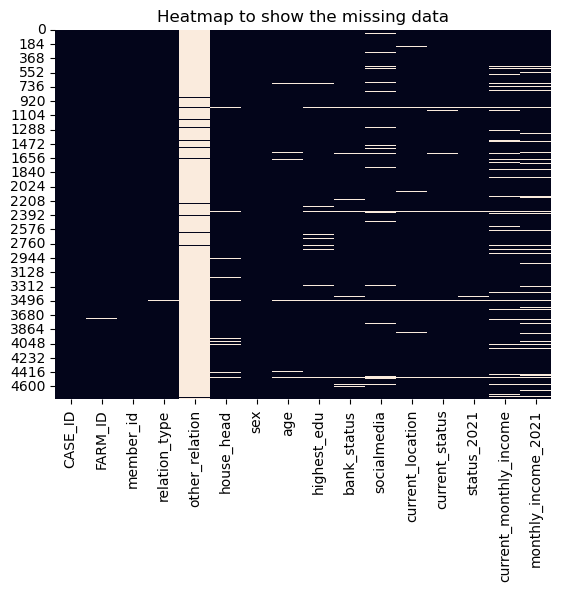

In [230]:
sns.heatmap(respondent_hh.isna(),
           cbar=None)
plt.title('Heatmap to show the missing data')
plt.show()

In [246]:
respondent_hh.shape

(4766, 16)

In [283]:
# head of the house 
head_house=respondent_hh[respondent_hh['house_head']=='Yes']
head_house.head(3)

,CASE_ID,FARM_ID,member_id,relation_type,other_relation,house_head,sex,age,highest_edu,bank_status,socialmedia,current_location,current_status,status_2021,current_monthly_income,monthly_income_2021
0,4754249,236.0,1,1,NaN,Yes,Male,62.0,"Secondary special, incomplete higher (technica...",Yes,Yes,This village,Pensioner,"Work based on engagement contract, author cont...",NaN,NaN
1,4754562,2537.0,1,1,NaN,Yes,Male,22.0,Base higher (bachelor degree),Yes,Yes,This village,Student,Student,2000 to 5000 UAH,2000 to 5000 UAH
2,4754562,2537.0,2,Mother/Farther,NaN,Yes,Male,43.0,Base higher (bachelor degree),Yes,Yes,This village,Employed by an employer (in the private or pub...,Employed by an employer (in the private or pub...,10000 to 15000 UAH,10000 to 15000 UAH


In [366]:
head_df=head_house.groupby('FARM_ID')['sex'].agg(list)
head_df

FARM_ID
13.0             [Male]
14.0             [Male]
19.0             [Male]
22.0             [Male]
39.0           [Female]
               ...     
11676.0          [Male]
11686.0          [Male]
11703.0    [Male, Male]
11719.0        [Female]
11747.0          [Male]
Name: sex, Length: 1797, dtype: object

In [323]:
male=head_df.apply(lambda x: 'Male' in x and 'Female' not in x).sum()
female=head_df.apply(lambda x: 'Female' in x and 'Male' not in x).sum()
male_and_female=head_df.apply(lambda x: 'Male' in x and 'Female' in x).sum()

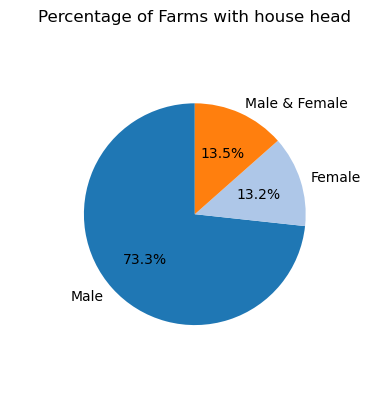

In [328]:
values = [male, female, male_and_female]
labels = ['Male', 'Female', 'Male & Female']

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, radius=0.75)
plt.title('Percentage of Farms with house head')
plt.show()

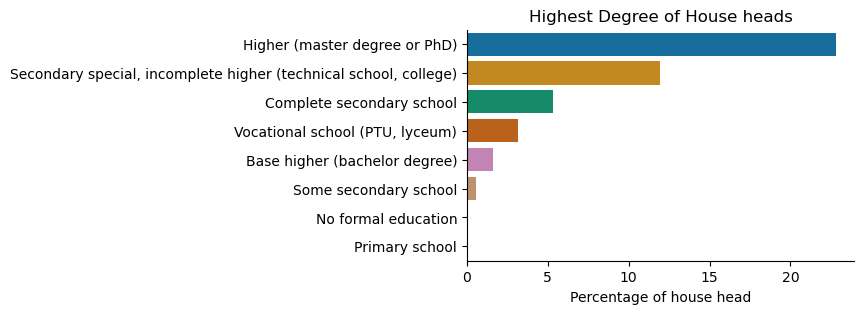

In [523]:
plt.figure(figsize=(5,3))
degree=head_house['highest_edu'].value_counts()/respondent_hh['highest_edu'].value_counts().sum()*100
sns.barplot(x=degree.values,
           y=degree.index)
sns.despine()
plt.xlabel('Percentage of house head')
plt.title('Highest Degree of House heads')
plt.show()

In [373]:
social=respondent_hh.groupby('CASE_ID')['socialmedia'].agg(list).apply(lambda x: 'Yes' in x).value_counts()

True     1478
False     366
Name: socialmedia, dtype: int64

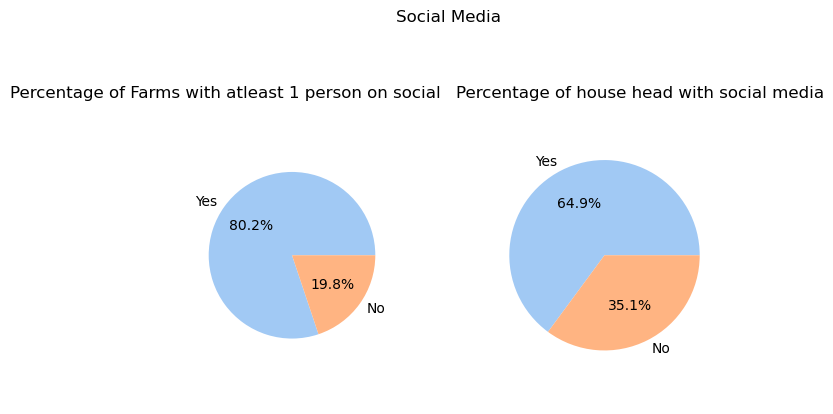

In [416]:
sns.set_palette('pastel')
fig,axes=plt.subplots(1,2)
axes[0].pie(social,
        autopct='%1.1f%%',
       labels=['Yes','No'],
           radius=0.7)

axes[1].pie(head_house['socialmedia'].value_counts(),
           autopct='%.1f%%',
           labels=['Yes','No'],
           radius=0.8)

axes[0].set_title('Percentage of Farms with atleast 1 person on social',loc='right')
axes[1].set_title('Percentage of house head with social media',loc='left')
plt.suptitle('Social Media')
plt.tight_layout()
plt.show()

> 80.2% of farms have atleast 1 person on Social Media. 

>About 35% of house heads do not have social media.

#### Effect of war on profession

In [463]:
# status after the war 
status_now=respondent_hh['current_status'].value_counts()

In [464]:
# status in 2021
status_21=respondent_hh['status_2021'].value_counts()

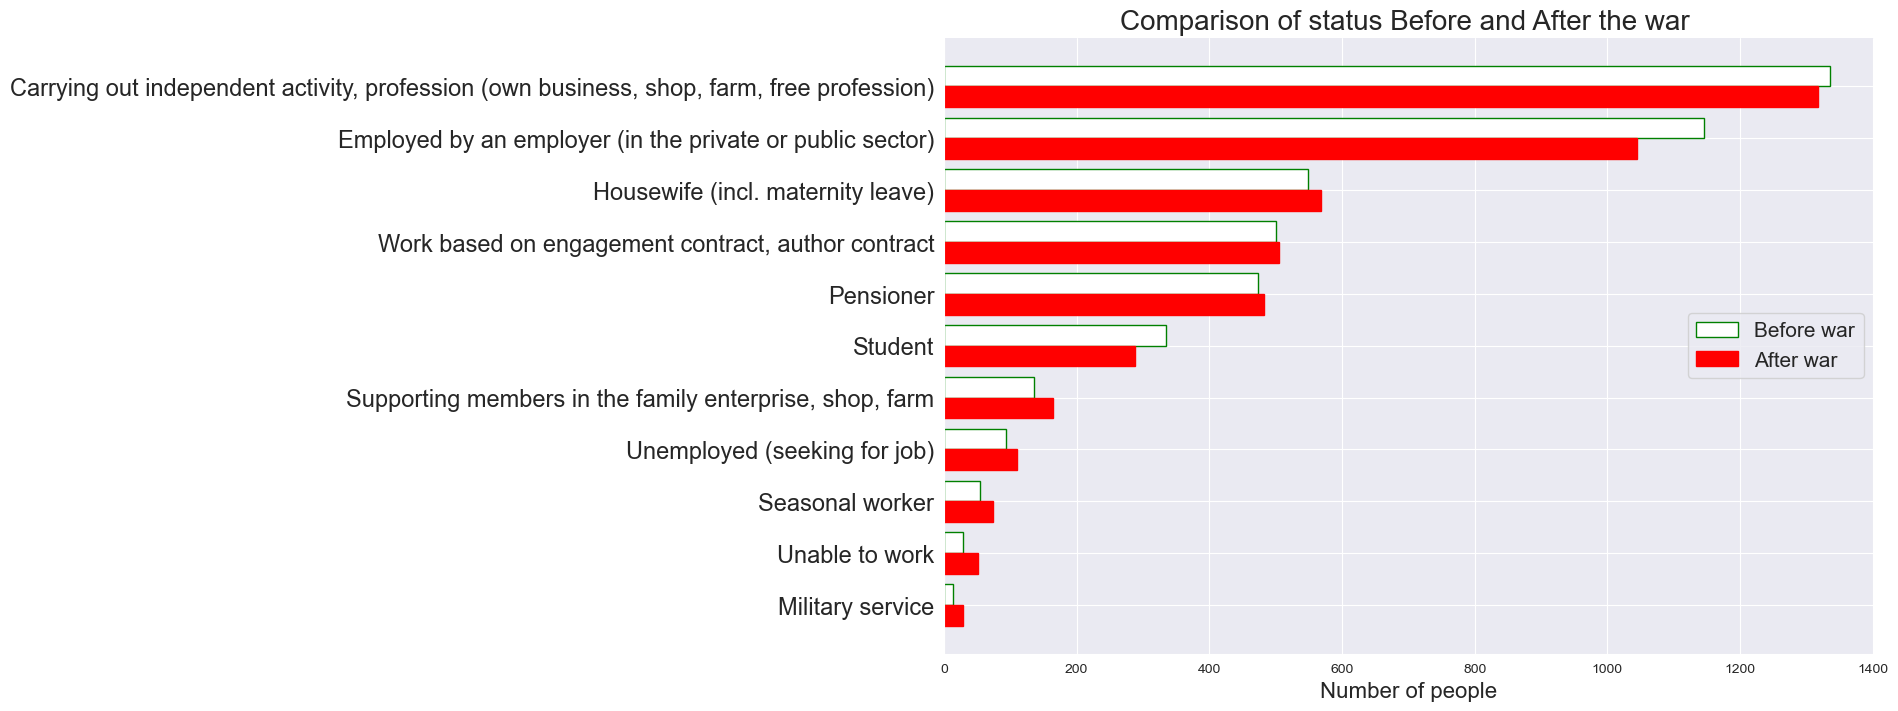

In [592]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
Y_axis = np.arange(len(status_now))

plt.barh(Y_axis-0.2,status_21.values,height=0.4,align='center',color='white',edgecolor='green')
plt.barh(Y_axis+0.2,status_now.values,height=0.4,align='center',color='r',edgecolor='r')

plt.yticks(Y_axis,labels=status_21.index,fontsize=17)
sns.despine()
# reverse the order
plt.gca().invert_yaxis()
plt.legend(['Before war','After war'],loc='right',fontsize=15)
plt.xlabel('Number of people',fontsize=16)
plt.title('Comparison of status Before and After the war ',fontsize=20)
plt.show()

> Unemplyment increased after the war and many people lost their jobs in the private or public sector.

> More poeple got enrolled in the Military services.

#### Comparison of monthly income

In [582]:
income_after=respondent_hh['current_monthly_income'].value_counts()
income_before=respondent_hh['monthly_income_2021'].value_counts()

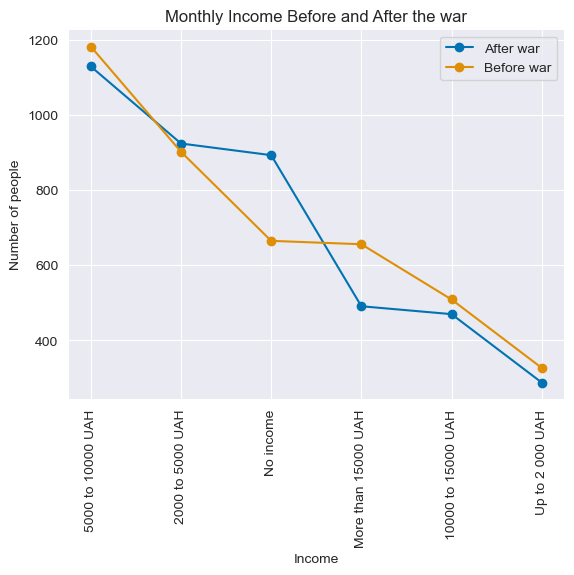

In [575]:
plt.plot(income_after,marker='o')
plt.plot(income_before,marker='o')
plt.xlabel('Income')
plt.xticks(rotation=90)
plt.legend(['After war','Before war'])
plt.ylabel('Number of people')
sns.despine()
plt.title('Monthly Income Before and After the war')
plt.show()

> The number of people with no income increased due to unemployment.

### Destruction by war

In [1076]:
agriculture.head()

,CASE_ID,FARM_ID,region,area_2022,war_damage,s2_q2_1,s2_q2_2,s2_q2_3,s2_q2_4,s2_q2_5,...,harvmp_22,harvmpind_22,plowp_21,plowpind_21,plowp_22,plowpind_22,wage_21,wageind_21,wage_22,wageind_22
0,4956146,7977.0,Central,88.0,None,Yes,Yes,Yes,No,No,...,1700,1.133333,1200.0,1,1600,1.333333,500.0,1,550.844971,1.10169
1,4999029,5604.0,Central,340.0,None,Yes,No,No,No,No,...,1700,1.133333,1200.0,1,1600,1.333333,500.0,1,550.844971,1.10169
2,4823252,4343.0,Central,3.0,None,Yes,No,No,No,No,...,1700,1.133333,1200.0,1,1600,1.333333,500.0,1,550.844971,1.10169
3,6298177,11651.0,Central,50.0,None,Yes,No,No,No,No,...,1700,1.133333,1200.0,1,1600,1.333333,500.0,1,550.844971,1.10169
4,6400661,9995.0,Central,1900.0,None,No,Yes,No,No,No,...,1700,1.133333,1200.0,1,1600,1.333333,500.0,1,550.844971,1.10169


In [1078]:
war_dmg=agriculture.iloc[:,:5]
war_dmg.head()

,CASE_ID,FARM_ID,region,area_2022,war_damage
0,4956146,7977.0,Central,88.0,None
1,4999029,5604.0,Central,340.0,None
2,4823252,4343.0,Central,3.0,None
3,6298177,11651.0,Central,50.0,None
4,6400661,9995.0,Central,1900.0,None


In [1081]:
# percentage of null values 
(war_dmg.isna().sum()/len(war_dmg))*100

CASE_ID       0.000000
FARM_ID       0.044425
region        0.000000
area_2022     1.021768
war_damage    0.177699
dtype: float64

#### Direct destruction by war

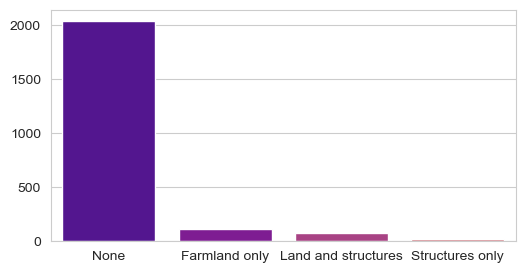

In [1112]:
plt.figure(figsize=(6,3))
sns.set_palette('plasma')
sns.barplot(x=war_dmg['war_damage'].value_counts().index,
       y=war_dmg['war_damage'].value_counts().values)
plt.show()

In [1237]:
price.head()

,region,year,median_fertilizer_price(UAH/50kg),fert_price_index,median_diesel(UAH/liter),diesel_p_ind,median_wheat_harvesting(uah/ha),wheat_ind,wheat_service(village),wheat_vil_ind,median_maize_harv,maize_ind,median_plowing(uah/ha),plow_ind,wage(uah/day),wageind
0,Central,21,556.100000,1.000000,28.17,1.000000,1200.000000,1.000000,1200.0,1.000000,1500,1.000000,1200.0,1.000000,500.000000,1.000000
1,Central,22,1400.431034,2.518308,53.39,1.895279,1672.775024,1.393979,1550.0,1.291667,1700,1.133333,1600.0,1.333333,550.844971,1.101690
2,East,21,550.000000,1.000000,28.26,1.000000,1025.000000,1.000000,1000.0,1.000000,1500,1.000000,600.0,1.000000,445.000000,1.000000
3,East,22,1375.001944,2.500004,54.14,1.915782,1500.000000,1.463415,1300.0,1.300000,2000,1.333333,925.0,1.541667,587.500000,1.320225
4,North,21,550.000000,1.000000,28.00,1.000000,1404.000000,1.000000,1100.0,1.000000,1315,1.000000,767.5,1.000000,450.000000,1.000000


#### Fertilizer prices before and after the war

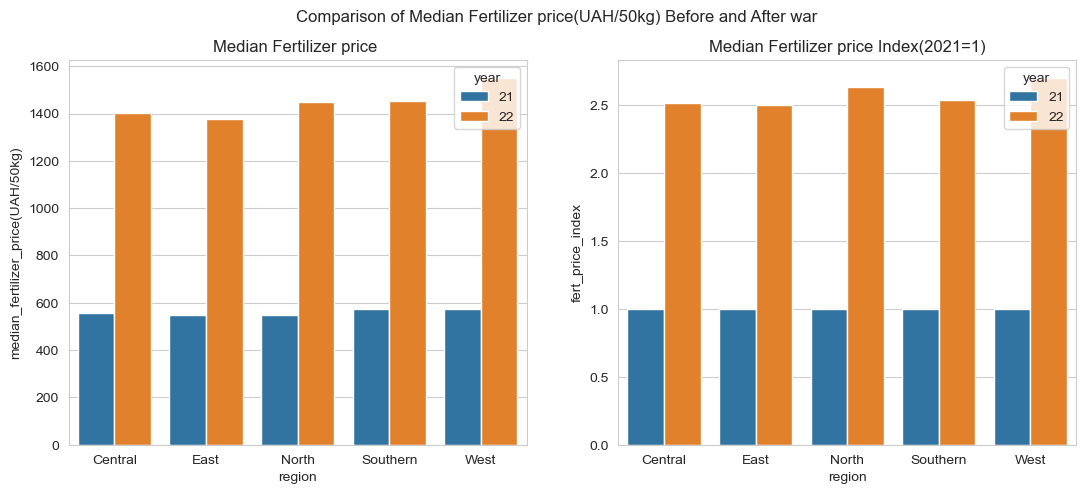

In [1278]:
sns.set_style('whitegrid')
sns.set_palette('tab10')
fig,axes=plt.subplots(1,2,figsize=(13,5))

sns.barplot(data=price,
            x='region',
    y='median_fertilizer_price(UAH/50kg)',
           hue='year',
           ax=axes[0])

sns.barplot(data=price,
            x='region',
    y='fert_price_index',
           hue='year',
           ax=axes[1])

plt.suptitle('Comparison of Median Fertilizer price(UAH/50kg) Before and After war')
axes[0].set_title('Median Fertilizer price ')
axes[1].set_title('Median Fertilizer price Index(2021=1)')
plt.show()

> The index graph clearly indicates a significant surge in fertilizer prices, surpassing the previous year's figures by more than twofold.

#### Diesel prices before and after the war

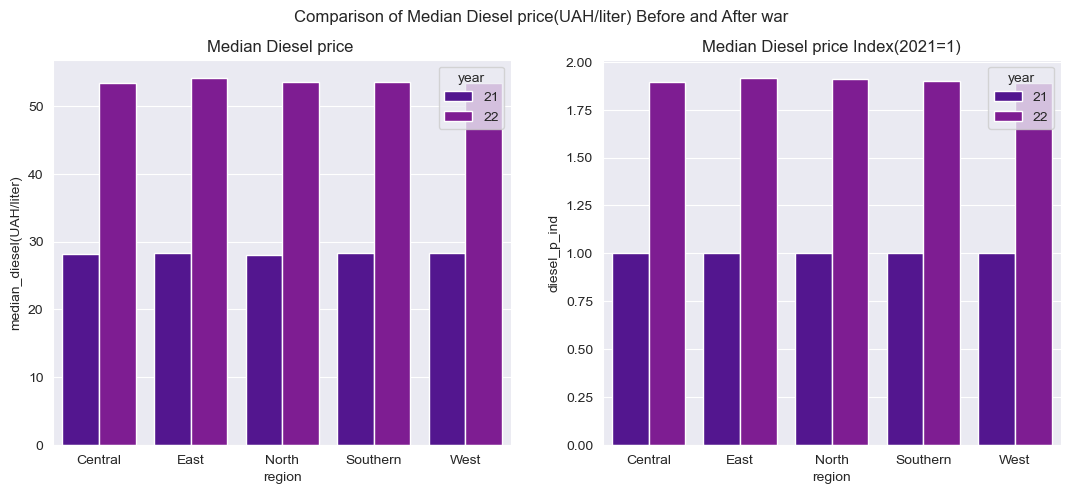

In [1280]:
sns.set_style('darkgrid')
sns.set_palette('plasma')
fig,axes=plt.subplots(1,2,figsize=(13,5))

sns.barplot(data=price,
            x='region',
    y='median_diesel(UAH/liter)',
           hue='year',
           ax=axes[0])

sns.barplot(data=price,
            x='region',
    y='diesel_p_ind',
           hue='year',
           ax=axes[1])

plt.suptitle('Comparison of Median Diesel price(UAH/liter) Before and After war')
axes[0].set_title('Median Diesel price ')
axes[1].set_title('Median Diesel price Index(2021=1)')
plt.show()

The Diesel prices have witnessed a substantial increase compared to the previous year, nearly doubling in value.

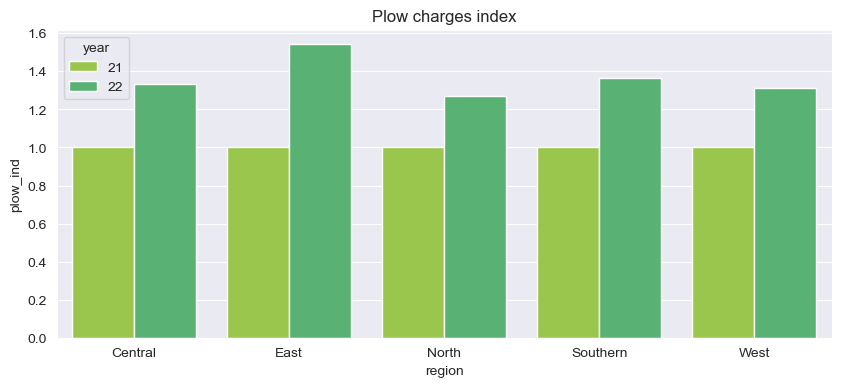

In [1291]:
plt.figure(figsize=(10,4))
sns.set_palette('viridis_r')
sns.barplot(data=price,
           x='region',
           y='plow_ind',
           hue='year')
plt.title('Plow charges index')
plt.show()

> Plowing charges have increased after the war.

## Property and Finance

In [435]:
finance.head()

,CASE_ID,FARM_ID,fulltime_worker_22,parttime_worker_22,employees_22,fulltime_worker_21,partime_worker_21,employees_21,lease_price(per ha),lease_land,...,s3_q14c_5,s3_q14c_8,s3_q14c_9,s3_q14c_6,s3_q14c_7,govt_1,govt_2,govt_3,govt_4,govt_5
0,4968826,8454.0,1.0,1.0,0.0,1.0,1.0,0.0,3000.0,Yes,...,No,No,No,No,No,No,No,Yes,No,No
1,4914858,6111.0,3.0,2.0,0.0,2.0,3.0,0.0,5000.0,Yes,...,No,Yes,No,No,No,No,No,Yes,No,Yes
2,6400228,6771.0,1.0,0.0,0.0,1.0,0.0,0.0,280.0,Yes,...,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes
3,4913233,6388.0,0.0,0.0,10.0,0.0,0.0,10.0,NaN,No,...,No,No,No,No,No,No,No,No,No,No
4,4794302,3663.0,1.0,1.0,1.0,1.0,1.0,1.0,7000.0,Yes,...,No,No,No,No,No,No,Yes,No,No,No


In [593]:
finance.shape

(2251, 65)

In [999]:
finance.loc[:,'govt_1':'govt_5'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   govt_1  2251 non-null   object
 1   govt_2  2251 non-null   object
 2   govt_3  2251 non-null   object
 3   govt_4  2251 non-null   object
 4   govt_5  2251 non-null   object
dtypes: object(5)
memory usage: 88.1+ KB


Replace the strings to interger or boolean using replace. 

In [1001]:
mapping = {'Yes': 1, 'No': 0}
finance.loc[:, 'govt_1':'govt_5'] = finance.loc[:, 'govt_1':'govt_5'].replace(mapping)

In [1002]:
finance.loc[:,'govt_1':'govt_5'].head(2)

,govt_1,govt_2,govt_3,govt_4,govt_5
0,0,0,1,0,0
1,0,0,1,0,1


In [1012]:
# rename the columns 
col_names = {
    'govt_1': 'Accessible credits',
    'govt_2': 'Government procurement of agricultural output',
    'govt_3': 'Regulation of the prices for inputs (fuel, seeds, fertilizers etc.)',
    'govt_4': 'Tax reduction',
    'govt_5': 'Markets access'
}

In [1014]:
finance.rename(columns=col_names,inplace=True)

In [1052]:
# do the same 
# mapping = {'Yes': 1, 'No': 0}
finance.loc[:,'government':'private_supplier']=finance.loc[:,'government':'private_supplier'].replace(mapping)

### Compare average lease price paid by villagers and non-villagers

In [603]:
# merge respondent with finance
respondent_finance=pd.merge(finance,respondent,on='CASE_ID',how='inner')

In [642]:
avg_lease_price=respondent_finance.groupby('is_Village')['lease_price(per ha)'].mean().to_frame().reset_index()
avg_lease_price

,is_Village,lease_price(per ha)
0,0,3259.581756
1,1,3369.015351


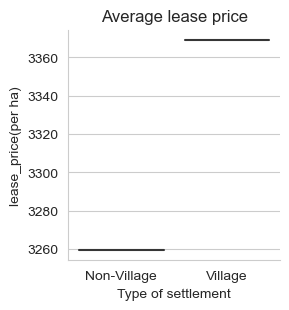

In [658]:

sns.set_style('whitegrid')
sns.catplot(data=avg_lease_price,
    x='is_Village',
    y='lease_price(per ha)',
           kind='violin',
           aspect=1,
           height=3)
plt.xticks([0,1],labels=['Non-Village','Village'])
plt.title('Average lease price')
plt.xlabel('Type of settlement')
plt.show()

In [676]:
on_lease=finance['lease_price(per ha)'].dropna().apply(lambda x: 1 if x==0 else 0).value_counts()
on_lease

0    1606
1     343
Name: lease_price(per ha), dtype: int64

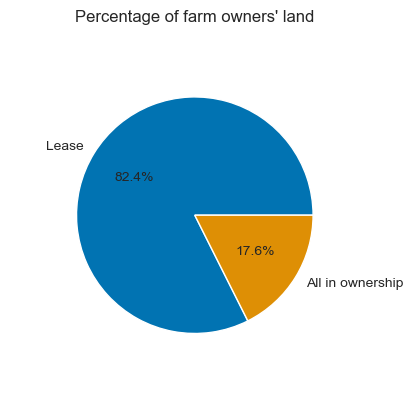

In [694]:
plt.pie(on_lease,
       autopct='%.1f%%',
       labels=['Lease','All in ownership'],
       radius=0.8)
plt.title("Percentage of farm owners' land")
plt.show()

> 82.4% of farm owners have leased land for agriculture.

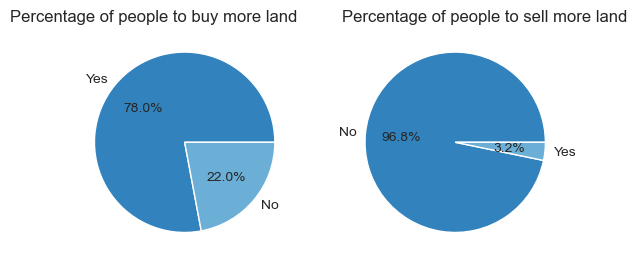

In [744]:
sns.set_palette('tab20c')
fig,axes=plt.subplots(1,2)
axes[0].pie(finance['buy_land'].value_counts(),
           autopct='%.1f%%',
           labels=['Yes','No'])
axes[1].pie(finance['sell_land'].value_counts(),
           autopct='%.1f%%',
           labels=['No','Yes'])
axes[0].set_title('Percentage of people to buy more land',loc='right')
axes[1].set_title('Percentage of people to sell more land',loc='left')
plt.show()

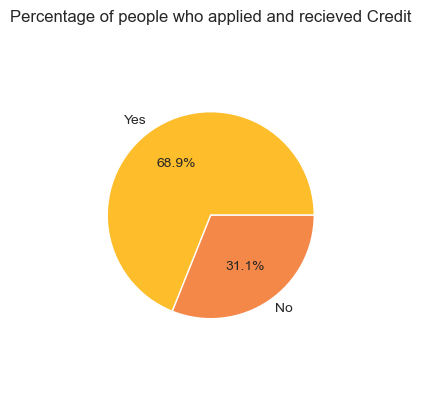

In [1114]:
sns.set_palette('plasma_r')
plt.pie(finance[finance['credit_applied']=='Yes']['credit_recieved'].value_counts(),
       labels=['Yes','No'],
       autopct='%.1f%%',
       radius=0.7)
plt.title('Percentage of people who applied and recieved Credit')
plt.show()

### When did they recieve last credit?

In [1141]:
last_credit_yr=finance['last_credit_year'].value_counts().head(10).to_frame().reset_index()

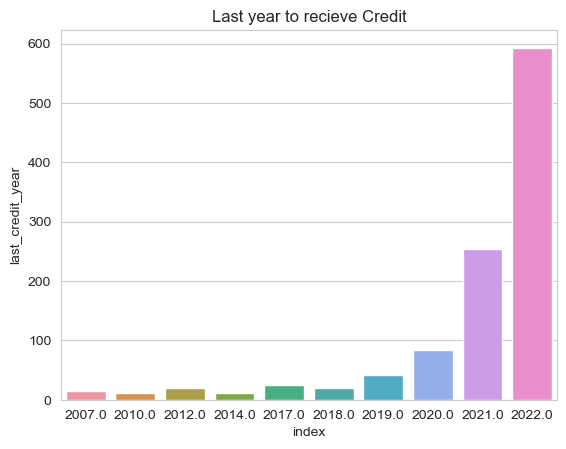

In [1155]:
sns.barplot(data=last_credit_yr,
            
            y='last_credit_year',
            x='index')
plt.title('Last year to recieve Credit')
plt.show()

> There are people who have not recieved credit since early 2019.

### Public social support

In [1177]:
public_sup21=finance['public_social_support_21'].value_counts('all')*100
public_sup22=finance['public_social_support_22'].value_counts('all')*100

In [1211]:
# percentage increase
print(public_sup22[1]-public_sup21[1])

6.57355835172044


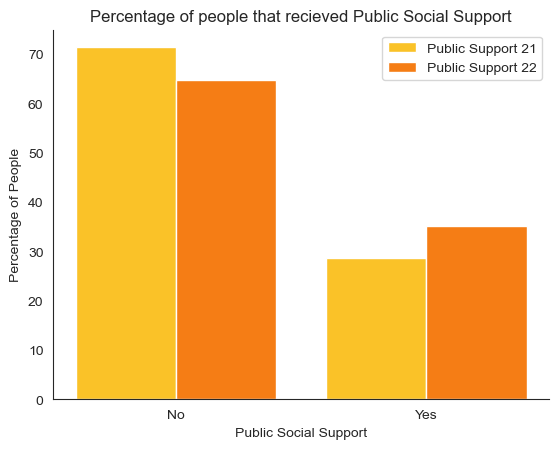

In [1219]:
sns.set_palette('inferno_r')
sns.set_style('white')
X_axis=np.arange(len(public_sup21))
plt.bar(X_axis-0.2,public_sup21.values,0.4,label='Public Support 21')
plt.bar(X_axis+0.2,public_sup22.values,0.4,label='Public Support 22')
plt.legend()
plt.xticks([0,1],['No','Yes'])
plt.title('Percentage of people that recieved Public Social Support')
plt.ylabel('Percentage of People')
plt.xlabel('Public Social Support')
sns.despine()
plt.show()

> The proportion of individuals receiving public social support in the year 2022 exhibited a notable increase of 6.5% compared to the previous year.

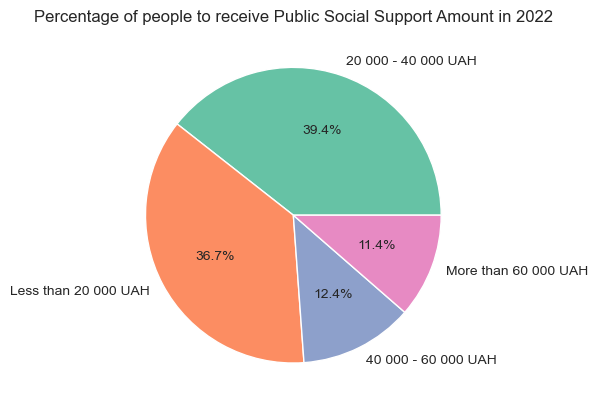

In [1221]:
sns.set_palette('Set2')
plt.pie(finance['support_amount_22'].value_counts(),
        labels=finance['support_amount_22'].value_counts().index,
       autopct='%.1f%%')
plt.title('Percentage of people to receive Public Social Support Amount in 2022')
plt.show()

**Technical assistance includes advisories on variety choice,
fertilizer application, pest control, other professional,
business, or managerial trainings, consultations, literature
etc.**

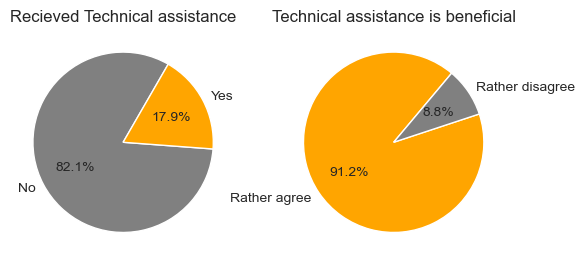

In [793]:

fig,axes=plt.subplots(1,2)
axes[0].pie(finance['technical_assistance'].value_counts(),
        labels=['No','Yes'],
        autopct='%.1f%%',
           startangle=60,
           colors=['grey','orange'])
axes[0].set_title('Recieved Technical assistance')

axes[1].pie(finance['require_technical_assistance'].value_counts(),
           labels=['Rather agree','Rather disagree'],
           autopct='%.1f%%',
           startangle=50,
           colors=['orange','grey'])
axes[1].set_title('Technical assistance is beneficial')
plt.show()

> 17.9% of people recieved technical assistance. Out of which, 91.2% agree that technical assistance is beneficial of productivity and growth.

In [1067]:
tech_assistance_provider=finance.loc[:,'government':'private_supplier'].dropna().apply(sum)
tech_assistance_provider

government           51.0
ngo                 193.0
other_farmers       124.0
int_org              33.0
private_supplier     47.0
dtype: float64

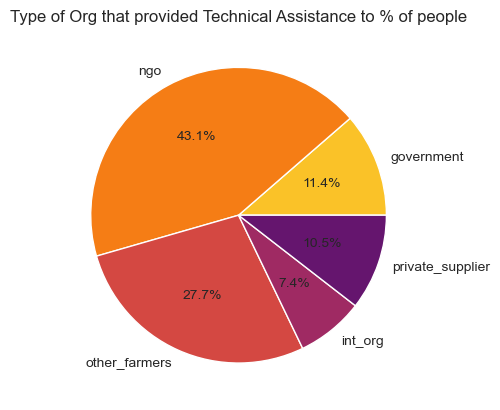

In [1075]:
plt.pie(tech_assistance_provider,
       autopct='%.1f%%',
       labels=tech_assistance_provider.index)
plt.title('Type of Org that provided Technical Assistance to % of people')
plt.show()

### Type of Assistance that people need

In [817]:
assistance1=finance['kind_of_assistance_1'].value_counts()
assistance1

Getting credit                                                                                        1148
DO NOT NEED ASSISTANCE                                                                                 428
Advisories on agricultural issues (e.g. variety choice, fertilizer application, pest control etc.)     377
Trainings related to doing business or management                                                      107
Providing literature                                                                                    38
Other assistance (SPECIFY)                                                                              14
Name: kind_of_assistance_1, dtype: int64

In [818]:
assistance1=assistance1/assistance1.values.sum()*100

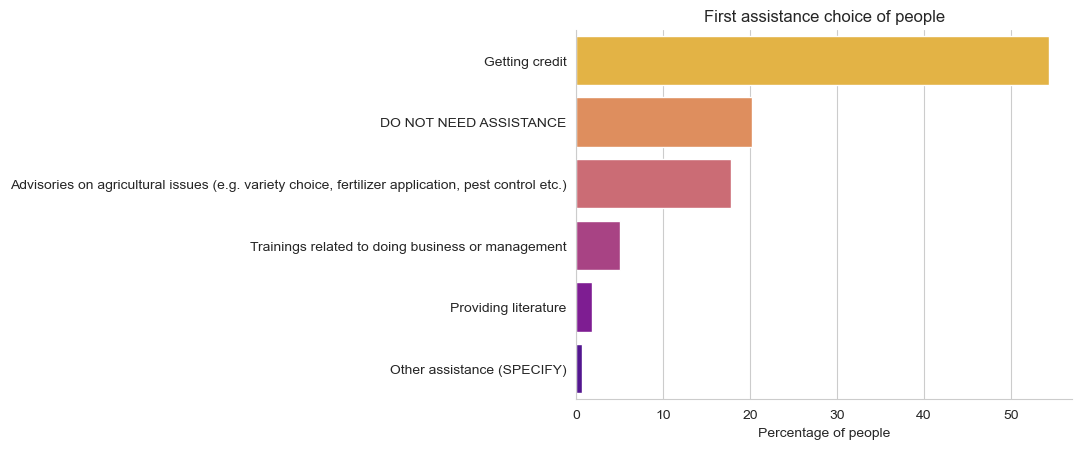

In [819]:
sns.barplot(
           y=assistance1.index,
           x=assistance1.values)

sns.despine()
plt.title('First assistance choice of people')
plt.xlabel('Percentage of people')
plt.show()

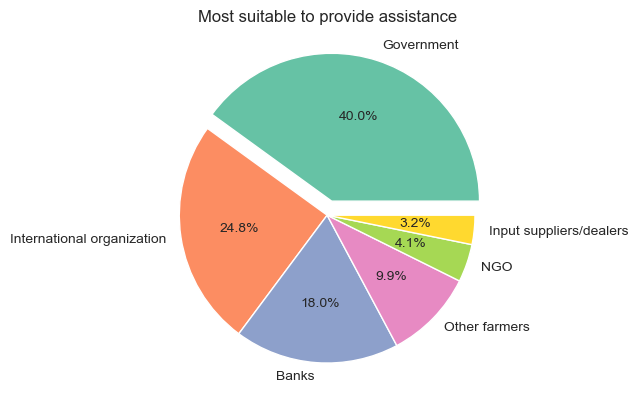

In [893]:
sns.set_palette('Set2')

plt.pie(finance['assistance_provider'].value_counts(),
       autopct='%.1f%%',
       labels=finance['assistance_provider'].value_counts().index,
       explode=[0.1,0,0,0,0,0])
plt.title('Most suitable to provide assistance')
plt.show()

### Most suitable to provide CREDIT SUPPORT

In [829]:
credit1=finance[finance['kind_of_assistance_1']=='Getting credit']['assistance_provider'].value_counts()
credit1

Government                    459
International organization    266
Banks                         258
NGO                             8
Input suppliers/dealers         6
Other farmers                   2
Name: assistance_provider, dtype: int64

In [832]:
credit1=credit1/credit1.sum()*100

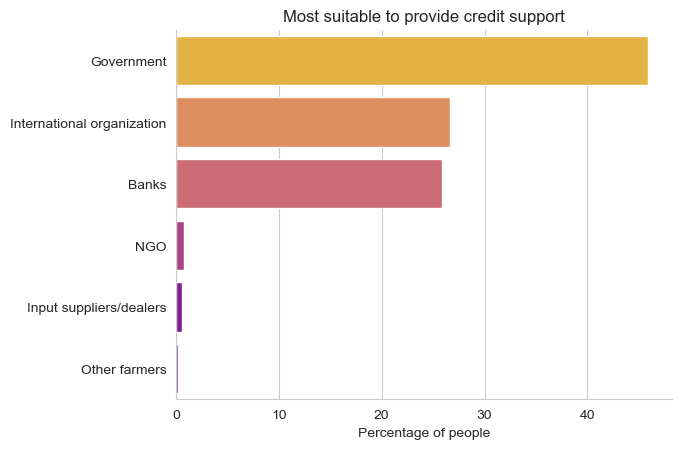

In [839]:
sns.barplot(
           y=credit1.index,
           x=credit1.values)
plt.title('Most suitable to provide credit support')
plt.xlabel('Percentage of people')
sns.despine()
plt.show()


### Second top most Type of Assistance

In [845]:
assistance2=finance['kind_of_assistance_2'].value_counts()
assistance2=assistance2/assistance2.sum()*100

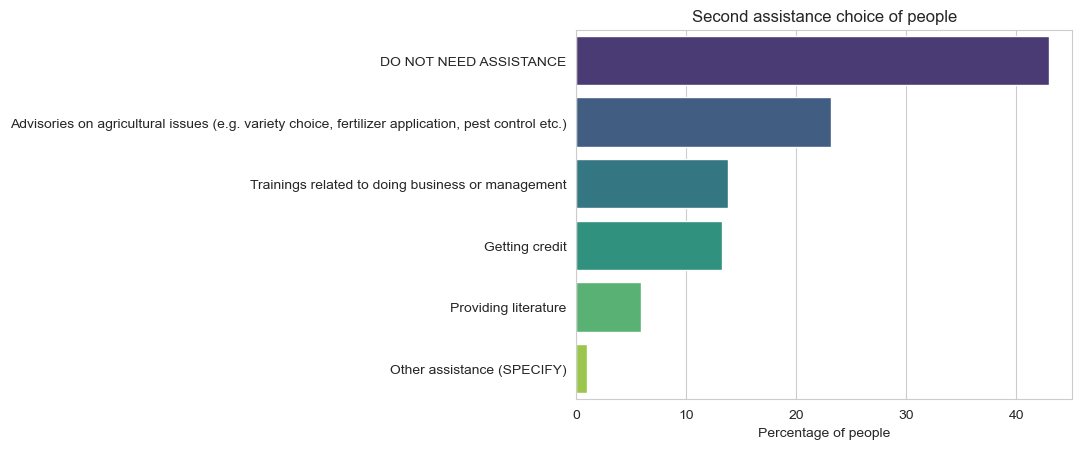

In [848]:
sns.set_palette('viridis')
sns.barplot(y=assistance2.index,
           x=assistance2.values)
plt.title('Second assistance choice of people')
plt.xlabel('Percentage of people')
plt.show()

### People rate the situation of the country before and after the war

In [897]:
country_before=finance['country_situation_before_war'].value_counts().to_frame().reset_index()
country_after=finance['country_situation_now'].value_counts().to_frame().reset_index()

In [900]:
country_rating=country_before.merge(country_after,on='index')

In [913]:
melt_country_rating=country_rating.melt(id_vars='index',
                   var_name='Year',
                   value_name='count')

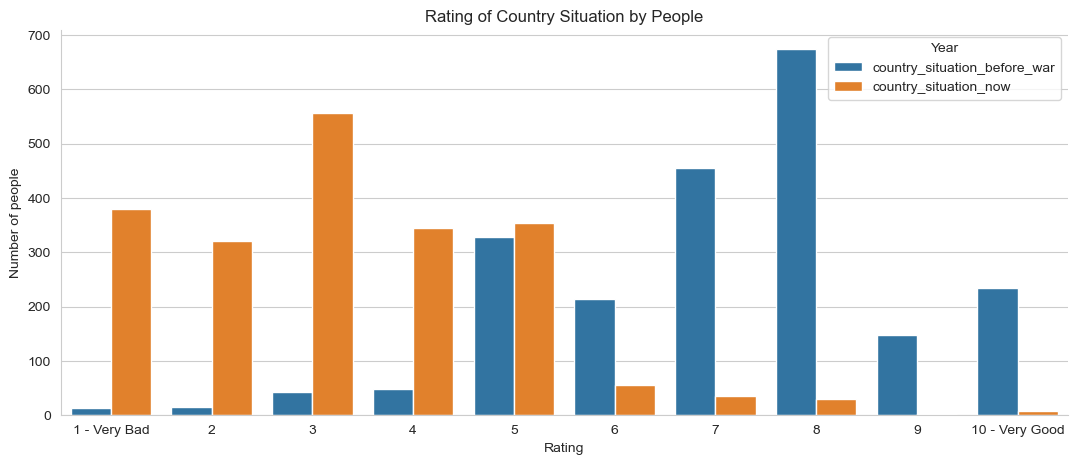

In [956]:
order=['1 - Very Bad','2','3','4','5','6','7','8','9','10 - Very Good']

sns.set_palette('tab10')
plt.figure(figsize=(13,5))
sns.barplot(data=melt_country_rating,
           x='index',
           y='count',
           hue='Year',
           order=order)
plt.title('Rating of Country Situation by People')
plt.xlabel('Rating')
plt.ylabel('Number of people')

sns.despine()
plt.show()

###  People rate their personal situation

In [932]:
personal_before=finance['personal_before_war'].value_counts().to_frame().reset_index()
personal_after=finance['personal_now'].value_counts().to_frame().reset_index()

personal=personal_before.merge(personal_after,on='index')

In [934]:
melt_personal= personal.melt(id_vars='index',
                            var_name='Year',
                            value_name='count')

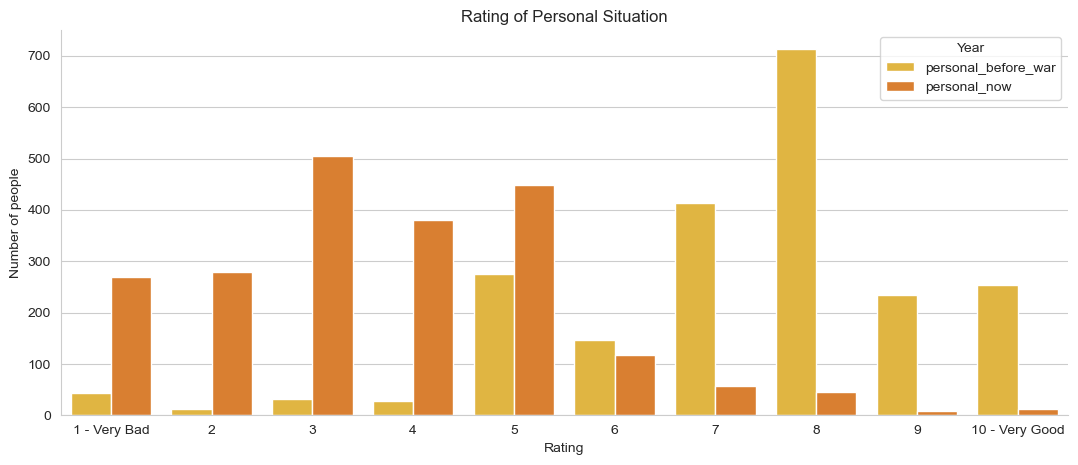

In [1074]:
sns.set_style('whitegrid')
order=['1 - Very Bad','2','3','4','5','6','7','8','9','10 - Very Good']

sns.set_palette('inferno_r')
plt.figure(figsize=(13,5))
sns.barplot(data=melt_personal,
           x='index',
           y='count',
           hue='Year',
           order=order)
plt.title('Rating of Personal Situation')
plt.xlabel('Rating')
plt.ylabel('Number of people')
sns.despine()
plt.show()

### Help from relative/neighbour in case of Emergency

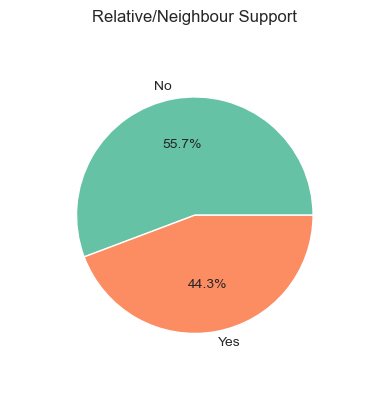

In [1235]:
plt.pie(finance['relative/neighbour_support'].value_counts(),
        labels=finance['relative/neighbour_support'].value_counts().index,
       autopct='%.1f%%',radius=0.8)
plt.title('Relative/Neighbour Support')
plt.show()

> 44.3% of people believe that they might get help from relative/neighbour in case of emergency.

### The important thing Government can do to help the people

In [1025]:
finance.iloc[:,-5:].head()

,Accessible credits,Government procurement of agricultural output,"Regulation of the prices for inputs (fuel, seeds, fertilizers etc.)",Tax reduction,Markets access
0,0,0,1,0,0
1,0,0,1,0,1
2,1,1,1,1,1
3,0,0,0,0,0
4,0,1,0,0,0


In [1041]:
govt_help= finance.iloc[:,-5:].apply(sum).sort_values(ascending=False)

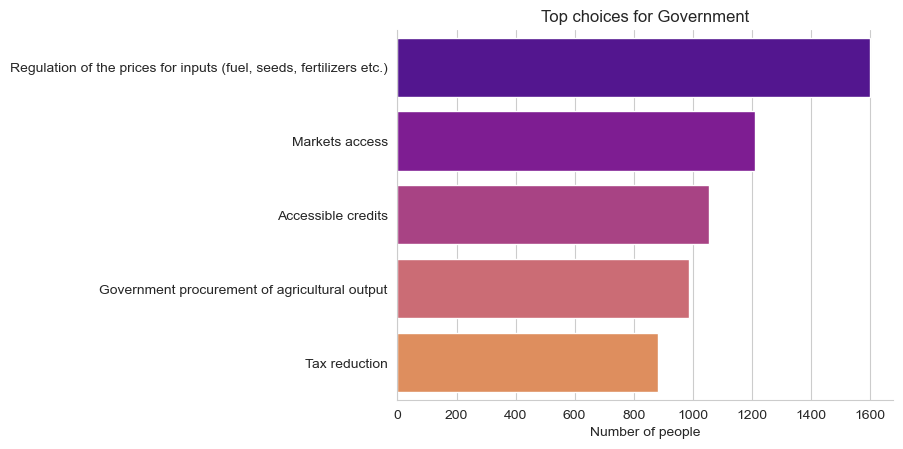

In [1113]:
sns.barplot(y=govt_help.index,
           x=govt_help.values)
plt.title('Top choices for Government')
sns.despine()
plt.xlabel('Number of people')
plt.show()